# Energy Consumption Estimates, 1949– 2012- Residential Sector 

Playing with Data from the Residential Sector Energy Consumption Estimates, 1949– 2012

Perry Grossman. 2015


Source: http://www.eia.gov/totalenergy/data/annual/#consumption

I downloaded this file:

http://www.eia.gov/totalenergy/data/browser/csv.cfm?tbl=T02.02

In [1]:
#Importing needed libraries:

import pandas as pd
from __future__ import division

import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

# IF Desired, for more plotting:
# import seaborn as sns

In [2]:
# Important to know which version is being used to know the available functionality.
pd.__version__

'0.16.2'

In [5]:
# Manually cleaned the data in Libre Office; now using that data.

Res_Energy_Consumption_1949_2012 = pd.read_csv('MER_T02_02-10-30-2015 _v1.csv')
# Original Data: Raw_Res_Energy_Consumption_1949_2012 = read_csv('MER_T02_02.csv')

# "Residential Sector Energy Consumption Estimates, 1949– 2012"
# Source: http://www.eia.gov/totalenergy/data/annual/#consumption

In [6]:
# Top of the file
Res_Energy_Consumption_1949_2012.head(10)

,MSN,YYYYMM,Value,Column_Order,Description,Unit,YYYY,MM
0,CLRCBUS,194913,1271.551,1,Coal Consumed by the Residential Sector,Trillion Btu,1949,13
1,CLRCBUS,195013,1261.267,1,Coal Consumed by the Residential Sector,Trillion Btu,1950,13
2,CLRCBUS,195113,1158.679,1,Coal Consumed by the Residential Sector,Trillion Btu,1951,13
3,CLRCBUS,195213,1079.206,1,Coal Consumed by the Residential Sector,Trillion Btu,1952,13
4,CLRCBUS,195313,965.664,1,Coal Consumed by the Residential Sector,Trillion Btu,1953,13
5,CLRCBUS,195413,858.255,1,Coal Consumed by the Residential Sector,Trillion Btu,1954,13
6,CLRCBUS,195513,867.431,1,Coal Consumed by the Residential Sector,Trillion Btu,1955,13
7,CLRCBUS,195613,838.910,1,Coal Consumed by the Residential Sector,Trillion Btu,1956,13
8,CLRCBUS,195713,653.734,1,Coal Consumed by the Residential Sector,Trillion Btu,1957,13
9,CLRCBUS,195813,663.496,1,Coal Consumed by the Residential Sector,Trillion Btu,1958,13


In [7]:
# The bottom of the file
Res_Energy_Consumption_1949_2012.tail(10)
#note the monthly and yearly data (MM =13)

,MSN,YYYYMM,Value,Column_Order,Description,Unit,YYYY,MM
6746,TERCBUS,201310,1368.665,12,Total Energy Consumed by the Residential Sector,Trillion Btu,2013,10
6747,TERCBUS,201311,1712.673,12,Total Energy Consumed by the Residential Sector,Trillion Btu,2013,11
6748,TERCBUS,201312,2402.746,12,Total Energy Consumed by the Residential Sector,Trillion Btu,2013,12
6749,TERCBUS,201313,21286.839,12,Total Energy Consumed by the Residential Sector,Trillion Btu,2013,13
6750,TERCBUS,201401,2773.735,12,Total Energy Consumed by the Residential Sector,Trillion Btu,2014,1
6751,TERCBUS,201402,2330.009,12,Total Energy Consumed by the Residential Sector,Trillion Btu,2014,2
6752,TERCBUS,201403,2063.318,12,Total Energy Consumed by the Residential Sector,Trillion Btu,2014,3
6753,TERCBUS,201404,1425.137,12,Total Energy Consumed by the Residential Sector,Trillion Btu,2014,4
6754,TERCBUS,201405,1346.358,12,Total Energy Consumed by the Residential Sector,Trillion Btu,2014,5
6755,TERCBUS,201406,1501.449,12,Total Energy Consumed by the Residential Sector,Trillion Btu,2014,6


In [9]:
#Use "NaN" for missing data for the Value field.

Res_Energy_Consumption_1949_2012.Value.replace({'Value': "Not Available"}, "NaN")

# Data is in Trillion Btus

# Python Reference: http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook-missing-data


0        1271.551
1        1261.267
2        1158.679
3        1079.206
4         965.664
5         858.255
6         867.431
7         838.910
8         653.734
9         663.496
10        573.321
11        585.284
12        533.611
13        520.794
14        438.442
15        378.720
16        351.657
17        348.790
18        298.819
19        264.330
20        248.107
21        209.380
22        171.986
23        115.782
24         11.894
25         10.188
26          8.000
27          5.237
28          5.313
29          5.330
          ...    
6726     1559.653
6727     1296.855
6728     1360.031
6729     1531.434
6730     1861.693
6731     1749.242
6732     1418.503
6733     1343.214
6734     1629.861
6735     2040.729
6736    19970.898
6737     2456.584
6738     2088.524
6739     2018.895
6740     1502.756
6741     1341.095
6742     1504.229
6743     1748.855
6744     1674.095
6745     1468.586
6746     1368.665
6747     1712.673
6748     2402.746
6749    21286.839
6750     2

In [10]:
# Get the sum of the Value field.
Res_Energy_Consumption_1949_2012.Value.sum

<bound method Series.sum of 0        1271.551
1        1261.267
2        1158.679
3        1079.206
4         965.664
5         858.255
6         867.431
7         838.910
8         653.734
9         663.496
10        573.321
11        585.284
12        533.611
13        520.794
14        438.442
15        378.720
16        351.657
17        348.790
18        298.819
19        264.330
20        248.107
21        209.380
22        171.986
23        115.782
24         11.894
25         10.188
26          8.000
27          5.237
28          5.313
29          5.330
          ...    
6726     1559.653
6727     1296.855
6728     1360.031
6729     1531.434
6730     1861.693
6731     1749.242
6732     1418.503
6733     1343.214
6734     1629.861
6735     2040.729
6736    19970.898
6737     2456.584
6738     2088.524
6739     2018.895
6740     1502.756
6741     1341.095
6742     1504.229
6743     1748.855
6744     1674.095
6745     1468.586
6746     1368.665
6747     1712.673
6748     2402.746


In [11]:
# Show a cumulative sum
Res_Energy_Consumption_1949_2012.Value.cumsum()

0          1271.551
1          2532.818
2          3691.497
3          4770.703
4          5736.367
5          6594.622
6          7462.053
7          8300.963
8          8954.697
9          9618.193
10        10191.514
11        10776.798
12        11310.409
13        11831.203
14        12269.645
15        12648.365
16        13000.022
17        13348.812
18        13647.631
19        13911.961
20        14160.068
21        14369.448
22        14541.434
23        14657.216
24        14669.110
25        14679.298
26        14687.298
27        14692.535
28        14697.848
29        14703.178
           ...     
6726    4867379.179
6727    4868676.034
6728    4870036.065
6729    4871567.499
6730    4873429.192
6731    4875178.434
6732    4876596.937
6733    4877940.151
6734    4879570.012
6735    4881610.741
6736    4901581.639
6737    4904038.223
6738    4906126.747
6739    4908145.642
6740    4909648.398
6741    4910989.493
6742    4912493.722
6743    4914242.577
6744    4915916.672


### Quick Data Analysis with Pandas: Yearly Data

In [12]:
# Use only yearly data
# MM = 13.

Res_Energy_Consumption_yr =  Res_Energy_Consumption_1949_2012[Res_Energy_Consumption_1949_2012.MM == 13]

In [14]:
# Use the pivot table function to show the values for each description
report = Res_Energy_Consumption_yr.pivot_table(values=['MSN', 'Value'],index=['Description'], aggfunc=np.sum)
report

# for just the top 10
#.head(n=10)

,Value
Description,
Biomass Energy Consumed by the Residential Sector,39274.232
Coal Consumed by the Residential Sector,15731.803
Electricity Retail Sales to the Residential Sector,160604.653
Geothermal Energy Consumed by the Residential Sector,399.354
Natural Gas Consumed by the Residential Sector (Excluding Supplemental Gaseous Fuels),276028.051
Petroleum Consumed by the Residential Sector,116309.700
Residential Sector Electrical System Energy Losses,363737.977
Solar/PV Energy Consumed by the Residential Sector,1992.769
Total Energy Consumed by the Residential Sector,974078.534


*Findings:*<br>
974,079 Trillion Btu Total Total Energy Consumed by the Residential Sector from 1949 to 2012.<br>
408,070 Trillion Btu Total Fossil Fuels Consumed by the Residential Sector from 1949 to 2012.<br>
Nearly, two-fifths of US energy over this time period is from fossil fuels.

### Create a dataframe of Total Energy Consumed by the Residential Sector (TERCBUS).

In [15]:
#Total Energy Consumed by the Residential Sector
TERCBUS_yr=  Res_Energy_Consumption_yr[Res_Energy_Consumption_yr.Description == 'Total Energy Consumed by the Residential Sector']   


'Total Energy Consumed by the Residential Sector'

In [16]:
# split by year-- proportion in each year and stack them.
# 
def get_max_record(group):
    return group.ix[group.Value.idxmax()]
TERCBUSresult =TERCBUS_yr.groupby('YYYY').apply(get_max_record)  

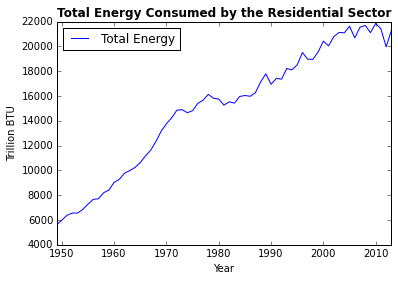

In [62]:
# Plot TERCBUS Values
TERCBUSresult.Value.plot()

# Making a title:
plt.title('Total Energy Consumed by the Residential Sector', weight='bold')
plt.ylabel('Trillion BTU')
plt.xlabel('Year')
plt.legend(['Total Energy'], loc ='best')


# The image can be saved as a pdf for later use:
plt.savefig('TERCBUSresult.pdf')

Finding: Total Energy Consumed by the Residential Sector generally increases over time, with some declines in recent years.

In [18]:
#Describe the numerical data for Total Energy Consumed by the Residential Sector.
TERCBUSresult.Value.describe()

count       65.000000
mean     14985.823600
std       4948.202277
min       5599.250000
25%      10639.387000
50%      15753.380000
75%      18964.947000
max      21853.030000
Name: Value, dtype: float64

Findings: There is data for 65 years. The average total energy usage is 14,986 trillion BTUs.

In [19]:
# Create an interger for the maximum value.
s =  int(max(TERCBUSresult.Value))

In [22]:
print "The maximum value (in trillion BTUs) is: %s " %s   # insert value into a string with the %s placeholder

The maximum value (in trillion BTUs) is: 21853 


### Create a dataframe of Total Fossil Fuels Consumed by the Residential Sector (TFFCRS).

In [23]:
#Total Fossil Fuels Consumed by the Residential Sector = TFFCRS
# use the yearly number:
TFFCRS_yr=  Res_Energy_Consumption_yr[Res_Energy_Consumption_yr.Description == 'Total Fossil Fuels Consumed by the Residential Sector']

In [24]:
TFFCRS_yr.head(10)

,MSN,YYYYMM,Value,Column_Order,Description,Unit,YYYY,MM
1689,FFRCBUS,194913,3405.248,4,Total Fossil Fuels Consumed by the Residential...,Trillion Btu,1949,13
1690,FFRCBUS,195013,3823.808,4,Total Fossil Fuels Consumed by the Residential...,Trillion Btu,1950,13
1691,FFRCBUS,195113,4146.264,4,Total Fossil Fuels Consumed by the Residential...,Trillion Btu,1951,13
1692,FFRCBUS,195213,4259.029,4,Total Fossil Fuels Consumed by the Residential...,Trillion Btu,1952,13
1693,FFRCBUS,195313,4220.568,4,Total Fossil Fuels Consumed by the Residential...,Trillion Btu,1953,13
1694,FFRCBUS,195413,4462.559,4,Total Fossil Fuels Consumed by the Residential...,Trillion Btu,1954,13
1695,FFRCBUS,195513,4832.746,4,Total Fossil Fuels Consumed by the Residential...,Trillion Btu,1955,13
1696,FFRCBUS,195613,5100.677,4,Total Fossil Fuels Consumed by the Residential...,Trillion Btu,1956,13
1697,FFRCBUS,195713,5042.088,4,Total Fossil Fuels Consumed by the Residential...,Trillion Btu,1957,13
1698,FFRCBUS,195813,5436.923,4,Total Fossil Fuels Consumed by the Residential...,Trillion Btu,1958,13


In [25]:
TFFCRS_yr.tail(10)

,MSN,YYYYMM,Value,Column_Order,Description,Unit,YYYY,MM
2128,FFRCBUS,200413,6512.558,4,Total Fossil Fuels Consumed by the Residential...,Trillion Btu,2004,13
2141,FFRCBUS,200513,6405.628,4,Total Fossil Fuels Consumed by the Residential...,Trillion Btu,2005,13
2154,FFRCBUS,200613,5706.282,4,Total Fossil Fuels Consumed by the Residential...,Trillion Btu,2006,13
2167,FFRCBUS,200713,6096.872,4,Total Fossil Fuels Consumed by the Residential...,Trillion Btu,2007,13
2180,FFRCBUS,200813,6339.689,4,Total Fossil Fuels Consumed by the Residential...,Trillion Btu,2008,13
2193,FFRCBUS,200913,6044.486,4,Total Fossil Fuels Consumed by the Residential...,Trillion Btu,2009,13
2206,FFRCBUS,201013,6003.429,4,Total Fossil Fuels Consumed by the Residential...,Trillion Btu,2010,13
2219,FFRCBUS,201113,5856.595,4,Total Fossil Fuels Consumed by the Residential...,Trillion Btu,2011,13
2232,FFRCBUS,201213,5137.410,4,Total Fossil Fuels Consumed by the Residential...,Trillion Btu,2012,13
2245,FFRCBUS,201313,5992.084,4,Total Fossil Fuels Consumed by the Residential...,Trillion Btu,2013,13


In [26]:
# Can just start from here now.
# Have it local, cleaned.
TFFCRS_yr.to_csv("TFFCRS_yr.csv", index=False)

In [27]:
# Summary for each name
# A series method.
TFFCRS_yr.groupby('YYYY')['Value'].describe()

YYYY       
1949  count       1.000
      mean     3405.248
      std           NaN
      min      3405.248
      25%      3405.248
      50%      3405.248
      75%      3405.248
      max      3405.248
1950  count       1.000
      mean     3823.808
      std           NaN
      min      3823.808
      25%      3823.808
      50%      3823.808
      75%      3823.808
      max      3823.808
1951  count       1.000
      mean     4146.264
      std           NaN
      min      4146.264
      25%      4146.264
      50%      4146.264
      75%      4146.264
      max      4146.264
1952  count       1.000
      mean     4259.029
      std           NaN
      min      4259.029
      25%      4259.029
      50%      4259.029
                 ...   
2010  std           NaN
      min      6003.429
      25%      6003.429
      50%      6003.429
      75%      6003.429
      max      6003.429
2011  count       1.000
      mean     5856.595
      std           NaN
      min      5856.595
    

In [28]:
# Summary for each year
# a series method providing the mean.
TFFCRS_yr.groupby('YYYY')['Value'].mean()

YYYY
1949    3405.248
1950    3823.808
1951    4146.264
1952    4259.029
1953    4220.568
1954    4462.559
1955    4832.746
1956    5100.677
1957    5042.088
1958    5436.923
1959    5541.385
1960    6024.205
1961    6188.746
1962    6519.627
1963    6552.846
1964    6612.693
1965    6811.272
1966    7045.412
1967    7277.387
1968    7507.234
1969    7827.744
1970    7921.629
1971    8045.577
1972    8247.603
1973    7871.212
1974    7536.958
1975    7564.221
1976    7909.501
1977    7651.836
1978    7638.094
          ...   
1984    6230.899
1985    6138.219
1986    5986.190
1987    6073.374
1988    6446.785
1989    6589.516
1990    5916.202
1991    6073.429
1992    6244.245
1993    6528.036
1994    6389.085
1995    6345.499
1996    6854.495
1997    6531.036
1998    5961.746
1999    6313.783
2000    6670.213
2001    6430.080
2002    6464.162
2003    6768.494
2004    6512.558
2005    6405.628
2006    5706.282
2007    6096.872
2008    6339.689
2009    6044.486
2010    6003.429
2011    5

In [29]:
# Create a Function to get the maximum Value over the years.
def get_max_record(group):
    return group.ix[group.Value.idxmax()]
TFFCRS_yr_max =TFFCRS_yr.groupby('Value').apply(get_max_record) 

In [30]:
TFFCRS_yr_max.ix[TFFCRS_yr_max.Value.idxmax()]

MSN                                                       FFRCBUS
YYYYMM                                                     197213
Value                                                    8247.603
Column_Order                                                    4
Description     Total Fossil Fuels Consumed by the Residential...
Unit                                                 Trillion Btu
YYYY                                                         1972
MM                                                             13
Name: 8247.603, dtype: object

1972 had the highest fossil fuel usage.

In [31]:
# Create a Function to get the maximum Value over the years.

# Revised. _result
def get_max_record_result(group):
    return group.ix[group.Value.idxmax()]
TFFCRS_yrresult =TFFCRS_yr.groupby('YYYY').apply(get_max_record) 

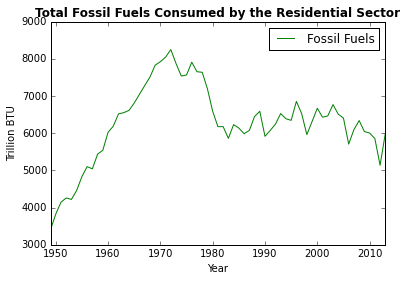

In [32]:
# Plot TFFCRS Over Time
#TFFCRS_yr.Value.plot()
TFFCRS_yrresult.Value.plot(c ="green")
# Making a title:
plt.title('Total Fossil Fuels Consumed by the Residential Sector', weight='bold')
plt.ylabel('Trillion BTU')
plt.xlabel('Year')
plt.legend(['Fossil Fuels'])

There was big growth in usage and then a big decline in about 1973.
That fits with the oil crisis: 
<br>
http://en.wikipedia.org/wiki/1973_oil_crisis

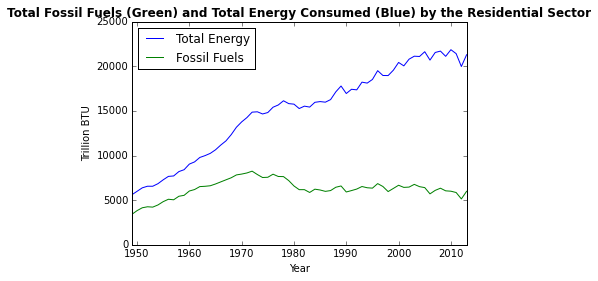

In [33]:
# Plot TERCBUS Values over time
TERCBUSresult.Value.plot(c ="blue")

# Plot TFFCRS over time
#TFFCRS_yrresult.Value.plot()
TFFCRS_yrresult.Value.plot(c ="green")

# Making a title:
plt.title('Total Fossil Fuels (Green) and Total Energy Consumed (Blue) by the Residential Sector', weight='bold')
plt.ylabel('Trillion BTU')
plt.xlabel('Year')
plt.legend(['Total Energy','Fossil Fuels'], loc = 'best')
#plt.legend(['Total Energy'])

# The image can be saved as a pdf for later use:
plt.savefig('TFFCRS_TERCBUS.pdf')
# The image can be saved as a png file for web use:
plt.savefig('TFFCRS_TERCBUS.png')



*Finding:* While U.S. residential total energy use has continued to increase since 1970, fossil fuel use has leveled off.

In [34]:
# Playing with Regression: Fossil Fuels: TFFCRS by Year
# Though autocorrelation issues may exist.
# See https://www.udel.edu/htr/Statistics/Notes816/class20.PDF for a description 

# Increase over time: Adj. R-squared: 0.042
# Statistically significant relationship at 90% Confidence Interval, but not at 95%: P =0.055
# But Durbin-Watson:0.105 suggests autocorrelation (less than 1 on a scale of 0 to 4

model = smf.ols('Value ~ YYYY', data=TFFCRS_yr)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3.832
Date:                Fri, 30 Oct 2015   Prob (F-statistic):             0.0547
Time:                        14:49:41   Log-Likelihood:                -541.44
No. Observations:                  65   AIC:                             1087.
Df Residuals:                      63   BIC:                             1091.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1.984e+04   1.33e+04     -1.487      0.142     -4.65e+04  6824.665
YYYY          13.1862      6.736      1.957      0.055        -0.275    26.648
==============================================================================
Omnibus:                        0.048   Durbin-Watson:                   0.105
Prob(Omnibus):                  0.976   Jarque-Bera (JB):                0.164
Skew:                           0.059   Prob(JB):                        0.921
Kurtosis:                       2.785   Cond. No.                     2.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*Finding:* <br>
Adj. R-squared:	0.042 indicates a mild positive relationship over time for residential fossil fuel consumption. The relationship is statistically significant at the 90% confidence interval (p = 0.055). However, auto-correlation is an important issue in time-series analyses and the Durbin-Watson test (d = 0.105) suggests autocorrelation and the concern that the level of statistical significance is underestimated.

As indicated in Wikipedia:<br>
"Since d is approximately equal to 2(1 − r), where r is the sample autocorrelation of the residuals,[3] d = 2 indicates no autocorrelation. The value of d always lies between 0 and 4. If the Durbin–Watson statistic is substantially less than 2, there is evidence of positive serial correlation. As a rough rule of thumb, if Durbin–Watson is less than 1.0, there may be cause for alarm. Small values of d indicate successive error terms are, on average, close in value to one another, or positively correlated. If d > 2, successive error terms are, on average, much different in value from one another, i.e., negatively correlated. In regressions, this can imply an underestimation of the level of statistical significance."<br>
Source: http://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic

Look to this exercise (https://www.udel.edu/htr/Statistics/Notes816/class20.PDF) for an interesting analysis of this energy data, with consideration of the energy crises of the early 1970s. Consider building on that work.


    

### Explore Yearly Energy Data By Fuel Type

The grouping documentation can be found here: 

http://pandas.pydata.org/pandas-docs/dev/groupby.html.

Split, Apply, and Combine.

In [35]:
Res_Energy_Consumption_yr_desc = Res_Energy_Consumption_yr.groupby(['Description'])
print Res_Energy_Consumption_yr

          MSN  YYYYMM      Value  Column_Order  \
0     CLRCBUS  194913   1271.551             1   
1     CLRCBUS  195013   1261.267             1   
2     CLRCBUS  195113   1158.679             1   
3     CLRCBUS  195213   1079.206             1   
4     CLRCBUS  195313    965.664             1   
5     CLRCBUS  195413    858.255             1   
6     CLRCBUS  195513    867.431             1   
7     CLRCBUS  195613    838.910             1   
8     CLRCBUS  195713    653.734             1   
9     CLRCBUS  195813    663.496             1   
10    CLRCBUS  195913    573.321             1   
11    CLRCBUS  196013    585.284             1   
12    CLRCBUS  196113    533.611             1   
13    CLRCBUS  196213    520.794             1   
14    CLRCBUS  196313    438.442             1   
15    CLRCBUS  196413    378.720             1   
16    CLRCBUS  196513    351.657             1   
17    CLRCBUS  196613    348.790             1   
18    CLRCBUS  196713    298.819             1   


In [63]:
# This is not working.
#grouped = Res_Energy_Consumption_yr_desc.groupby('MSN')

In [39]:
Res_Energy_Consumption_yr_desc

In [64]:
# Not working
#for Value, group in Res_Energy_Consumption_yr:
 #   print(Description)

## Renewables as a Percent of Primary Data
I think it should be based on primary data--For review.

Total Primary Energy Consumed by the Residential Sector	449735.904


Total Renewable Energy Consumed by the Residential Sector	41666.355


(Ideally, pull that directly)


In [68]:
s = round(41666/449736*100,2)
print "Overall, the percent renewable out of primary residential is: %s"  %s 

Overall, the percent renewable out of primary residential is: 9.26


### Create a 2013 DataFrame

In [45]:
#Show 2013 Monthly totals and yearly summary (MM=13)

TFFCRS2013 = Res_Energy_Consumption_1949_2012[Res_Energy_Consumption_1949_2012.YYYY == 2013].sort_index(by='MM',ascending=True)


In [47]:
# Print the dataframe
TFFCRS2013

,MSN,YYYYMM,Value,Column_Order,Description,Unit,YYYY,MM
544,CLRCBUS,201301,NaN,1,Coal Consumed by the Residential Sector,Trillion Btu,2013,1
6174,LORCBUS,201301,915.813,11,Residential Sector Electrical System Energy Lo...,Trillion Btu,2013,1
5611,ESRCBUS,201301,448.180,10,Electricity Retail Sales to the Residential Se...,Trillion Btu,2013,1
5048,TXRCBUS,201301,1092.590,9,Total Primary Energy Consumed by the Residenti...,Trillion Btu,2013,1
4485,RERCBUS,201301,71.222,8,Total Renewable Energy Consumed by the Residen...,Trillion Btu,2013,1
3922,BMRCBUS,201301,49.260,7,Biomass Energy Consumed by the Residential Sector,Trillion Btu,2013,1
3359,SORCBUS,201301,18.598,6,Solar/PV Energy Consumed by the Residential Se...,Trillion Btu,2013,1
2796,GERCBUS,201301,3.363,5,Geothermal Energy Consumed by the Residential ...,Trillion Btu,2013,1
2233,FFRCBUS,201301,1021.368,4,Total Fossil Fuels Consumed by the Residential...,Trillion Btu,2013,1
1670,PARCBUS,201301,121.437,3,Petroleum Consumed by the Residential Sector,Trillion Btu,2013,1


In [49]:
#birdseye, quick view of the data: as a cross tab-- just 2013 data.
pd.crosstab(TFFCRS2013.Description, TFFCRS2013.Value)

# Need to bin this.There are too many values

Value,3.038,3.255,3.363,16.799,17.998,18.598,39.6,44.493,47.671,49.26,...,2018.895,2088.524,2402.746,2456.584,4746.398,5052.996,5992.084,6830.665,9709.775,21286.839
Description,,,,,,,,,,,,,,,,,,,,,
Biomass Energy Consumed by the Residential Sector,0,0,0,0,0,0,0,1,4,7,...,0,0,0,0,0,0,0,0,0,0
Electricity Retail Sales to the Residential Sector,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Geothermal Energy Consumed by the Residential Sector,1,4,7,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Natural Gas Consumed by the Residential Sector (Excluding Supplemental Gaseous Fuels),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Petroleum Consumed by the Residential Sector,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Residential Sector Electrical System Energy Losses,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Solar/PV Energy Consumed by the Residential Sector,0,0,0,1,4,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Total Energy Consumed by the Residential Sector,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,1
Total Fossil Fuels Consumed by the Residential Sector,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Investigating the Full Dataset Some More

In [50]:
#a hierarchical index
Res_Energy_Consumption_1949_2012.groupby(['MM']).size().ix[13]

# a series. 

780

In [51]:
#groupby
Res_Energy_Consumption_1949_2012.groupby(['YYYY','Description']).size().ix[1980]

Description
Biomass Energy Consumed by the Residential Sector                                        13
Coal Consumed by the Residential Sector                                                  13
Electricity Retail Sales to the Residential Sector                                       13
Geothermal Energy Consumed by the Residential Sector                                     13
Natural Gas Consumed by the Residential Sector (Excluding Supplemental Gaseous Fuels)    13
Petroleum Consumed by the Residential Sector                                             13
Residential Sector Electrical System Energy Losses                                       13
Solar/PV Energy Consumed by the Residential Sector                                       13
Total Energy Consumed by the Residential Sector                                          13
Total Fossil Fuels Consumed by the Residential Sector                                    13
Total Primary Energy Consumed by the Residential Sector             

In [52]:
# Get the Max Record by Value: Fossil Fuels-- Residential
# Using the yearly dataframe
def get_max_record_yr(group):
    return group.ix[group.Value.idxmax()]
get_max_record_yr(TFFCRS_yr) 

MSN                                                       FFRCBUS
YYYYMM                                                     197213
Value                                                    8247.603
Column_Order                                                    4
Description     Total Fossil Fuels Consumed by the Residential...
Unit                                                 Trillion Btu
YYYY                                                         1972
MM                                                             13
Name: 1712, dtype: object

In [53]:
# Show the data types
TFFCRS_yr.dtypes

MSN              object
YYYYMM            int64
Value           float64
Column_Order      int64
Description      object
Unit             object
YYYY              int64
MM                int64
dtype: object

In [54]:
#converting to float.
TFFCRS_yr['YYYYfl'] = np.float32(TFFCRS_yr.YYYY)

# Need to figure this out.

/home/perry/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [56]:
# Show the data types now with Year as a float.
TFFCRS_yr.dtypes
# It seems to have worked (with a warning)
# SEE: YYYYfl          float32
# YYYY remains.

MSN              object
YYYYMM            int64
Value           float64
Column_Order      int64
Description      object
Unit             object
YYYY              int64
MM                int64
YYYYfl          float32
dtype: object

## Look at Natural Gas when I have more time

In [70]:
# not working
#NG_result.NaturalGas

In [71]:
# not working
#Res_Energy_Consumption_yr.NaturalGas

In [72]:
#Res_Energy_Consumption_yr.groupby(['Year','NaturalGas']).size().ix[2000]

##Total energy data by year regression analysis

In [74]:

# Following: http://allendowney.blogspot.com/
# from http://allendowney.blogspot.com/
# Value by year.
###NEEDS TO BE DONE BY EACH DESCRIPTION TYPE. and compared.
# also chart each comparison.

# Total energy data by year.
import statsmodels.formula.api as smf
model = smf.ols('Value ~ YYYY', data=Res_Energy_Consumption_1949_2012)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     70.37
Date:                Fri, 30 Oct 2015   Prob (F-statistic):           6.03e-17
Time:                        15:14:26   Log-Likelihood:                -55958.
No. Observations:                6208   AIC:                         1.119e+05
Df Residuals:                    6206   BIC:                         1.119e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   3.262e+04   3793.855      8.599      0.000      2.52e+04  4.01e+04
YYYY         -15.9716      1.904     -8.389      0.000       -19.704   -12.239
==============================================================================
Omnibus:                     7084.299   Durbin-Watson:                   1.398
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           593911.548
Skew:                           6.046   Prob(JB):                         0.00
Kurtosis:                      49.366   Cond. No.                     3.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Finding: Still a low Durbin-Watson.
Look for a more interesting and practical regression analysis.

In [75]:
# plot this later
#result.TOTAL.plot()


# Next Steps

In [78]:
# Merge in some other data and try to analyze it.
# Such as economic data.
# Perhaps do a state by state analysis of energy use and economic growth.
#  TestData2 = read_csv('TestData2.csv')

In [79]:
# pandas join function is merge
# merge?
# merge(Res_Primary_E_Consumption, TestData2, on= [ 'Year'])
# simple join on year 
# inner join is default

In [51]:
#merged = merge(Res_Primary_E_Consumption, TestData2, on= [ 'Year'])

In [80]:
#from __future__ import division
#if needed

In [93]:
#merged['NG'] = np.float32(merged.NaturalGas)

In [95]:
#merged['TTL']  = np.float32(merged.TOTAL)

In [101]:
#merged['RNW']  = np.float32(merged.Renewable)

In [98]:
# Create a new proportion variable
#merged['NG_percent'] = (merged.NG / merged.TTL)



In [81]:
# total test.. Create a new column called TOTALtest,
# need to add the number of persons
#merged['TOTALtest'] = np.floor(merged.TOTAL * merged.Col2)

#decimal numbers so use npl.floor

In [82]:
#merged.groupby(['Year', 'TOTALtest'])['Col3'].sum()
#for each year TOTALtest combo-- the total number of Col3.
#hierarchical labeling.

In [85]:
# Regression Analyses to come. For review
'''
import statsmodels.formula.api as smf
model = smf.ols('merged.TOTAL ~ merged.Col2', data=merged)
results_merged = model.fit()
results_merged.summary()
'''


"\nimport statsmodels.formula.api as smf\nmodel = smf.ols('merged.TOTAL ~ merged.Col2', data=merged)\nresults_merged = model.fit()\nresults_merged.summary()\n"

That is all I have for now.